<a href="https://colab.research.google.com/github/raziq0835/ML_Basics/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Tutorial - Student Template

## Introduction

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It's one of the most popular and powerful machine learning algorithms, known for its accuracy and robustness.

### Key Concepts:

1. **Ensemble Method**: Combines predictions from multiple models (decision trees)
2. **Bagging (Bootstrap Aggregating)**: Each tree is trained on a random subset of the data
3. **Feature Randomness**: Each tree considers only a random subset of features at each split
4. **Voting**: For classification, the final prediction is the mode of individual tree predictions
5. **Averaging**: For regression, the final prediction is the average of individual tree predictions

### Advantages of Random Forest:
- Reduces overfitting compared to individual decision trees
- Handles missing values well
- Provides feature importance rankings
- Robust to outliers
- Works well with both numerical and categorical data

### Disadvantages of Random Forest:
- Less interpretable than single decision trees
- Can be computationally expensive with large datasets
- May overfit on noisy datasets with many trees

In this tutorial, we'll explore how to implement Random Forest using scikit-learn with a real-world dataset.

In [ ]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
# TODO: Import numpy, pandas, matplotlib, seaborn, and sklearn modules
# Hint: You'll need datasets, train_test_split, RandomForestClassifier, RandomForestRegressor,
#       accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score,
#       LabelEncoder, and other necessary components

# Your code here:

adult = fetch_openml(name='adult', version=2, as_frame=True)
df = adult.frame.copy()


Libraries imported successfully!


## Dataset: Adult (Census Income)

We'll use the Adult dataset (also known as the Census Income dataset), which contains demographic information about individuals and whether they make more than $50K per year. This dataset has 48,842 samples and 15 features, making it an excellent example of a "big dataset" for machine learning.

### Features:
1. **age**: Continuous
2. **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
3. **fnlwgt**: Continuous (final weight)
4. **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
5. **education-num**: Continuous
6. **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
7. **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
8. **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
9. **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
10. **sex**: Female, Male
11. **capital-gain**: Continuous
12. **capital-loss**: Continuous
13. **hours-per-week**: Continuous
14. **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

### Target:
**income**: >50K, <=50K

Let's load the dataset and explore its structure.

In [ ]:
# Load the Adult (Census Income) dataset
# TODO: Use fetch_openml to load the 'adult' dataset
# TODO: Create a DataFrame from the dataset
# Hint: Use adult.frame.copy() to create a DataFrame

# Your code here:
# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {len(adult.feature_names)}")
print(f"Feature names: {adult.feature_names}")
print(f"Target variable: {adult.target_names}")

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset shape: (48842, 15)
Number of features: 14
Feature names: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
Target variable: ['class']

First 5 rows of the dataset:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Display basic statistics of the dataset
# TODO: Use the info() method to show dataset information

# Your code here:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n<-----------Dataset information:------------------>\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ")
display(df)
display(df.info())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<-----------Dataset information:------------------>
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


None

In [ ]:
# Check for missing values
# TODO: Check for missing values in the dataset
# Hint: Use isnull().sum() and filter for values > 0

# Your code here:
missing_values = df.isnull().sum()
print(missing_values[missing_values >0])
display( df.isnull().sum())

workclass         2799
occupation        2809
native-country     857
dtype: int64


,0
age,0
workclass,2799
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,2809
relationship,0
race,0
sex,0


## Data Preprocessing

Before training our Random Forest model, we need to preprocess the data. This includes handling missing values, encoding categorical variables, and preparing the data for machine learning.

In [ ]:
# Handle missing values
# TODO: Replace '?' with NaN
# TODO: Drop rows with missing values
# TODO: Print the new dataset shape
# TODO: Check the distribution of the target variable

# Your code here:
df=df.replace("?",np.nan)
df=df.dropna()
print(df.shape)



(45222, 15)


In [ ]:
# Encode categorical variables
# TODO: Define categorical columns
# TODO: Create label encoders for each categorical column
# TODO: Encode the target variable
# TODO: Print success message and show first few rows

# Your code here:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])




In [ ]:

print(f"\nPercentage of people earning >50K: {sum(df['class'] == '>50K') / len(df) * 100:.2f}%")


Percentage of people earning >50K: 24.78%


In [ ]:
# Handle missing values
# Replace '?' with NaN
df = df.replace('?', np.nan)

# Drop rows with missing values
df = df.dropna()

print(f"Dataset shape after removing missing values: {df.shape}")

Dataset shape after removing missing values: (45222, 15)


In [ ]:
catigorial_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
label_encoder={}
for column in catigorial_columns:
    label_encoder[column]=LabelEncoder()
    df[column]=label_encoder[column].fit_transform(df[column])

target_encoder=LabelEncoder()
df['class']=target_encoder.fit_transform(df['class'])

print("Catorigical variables encoded successfully! \n\n 1st  5 rows od encoded dataset -->")
display(df.head())

Catorigical variables encoded successfully! 

 1st  5 rows od encoded dataset -->


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


## Data Visualization

Let's visualize some key aspects of our data to better understand the relationships.

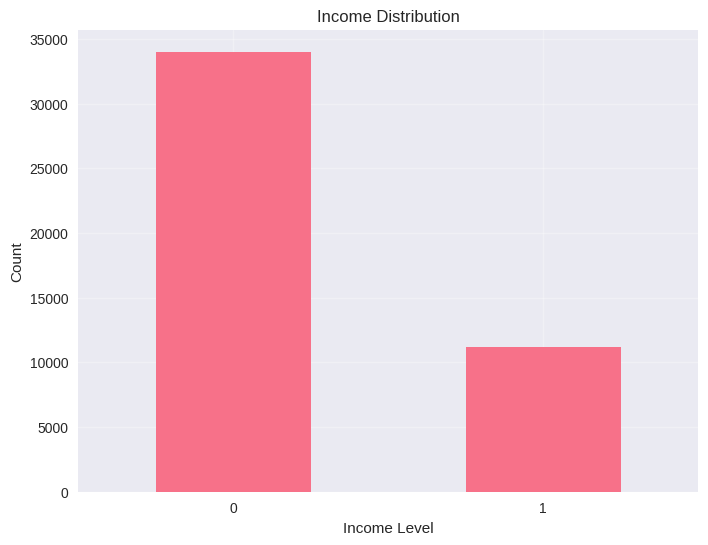

In [ ]:
# Plot the distribution of the target variable
# TODO: Create a bar plot of the target variable distribution
# Hint: Use value_counts().plot(kind='bar')

# Your code here:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
df['class'].value_counts().plot(kind='bar')
plt.title('Income Distribution')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

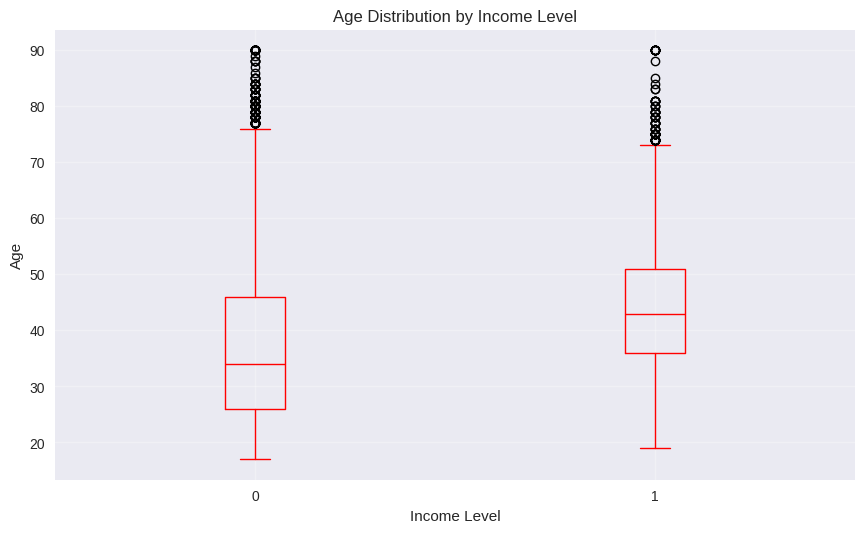

In [ ]:
# Plot the relationship between age and income
# TODO: Create a boxplot of age by income level
# Hint: Use boxplot() with column and by parameters

# Your code here:

plt.figure(figsize=(10, 6))
df.boxplot(column='age', by='class', ax=plt.gca(),color="red")
plt.title('Age Distribution by Income Level')
plt.suptitle('')
plt.xlabel('Income Level')
plt.ylabel('Age')
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1200x600 with 0 Axes>

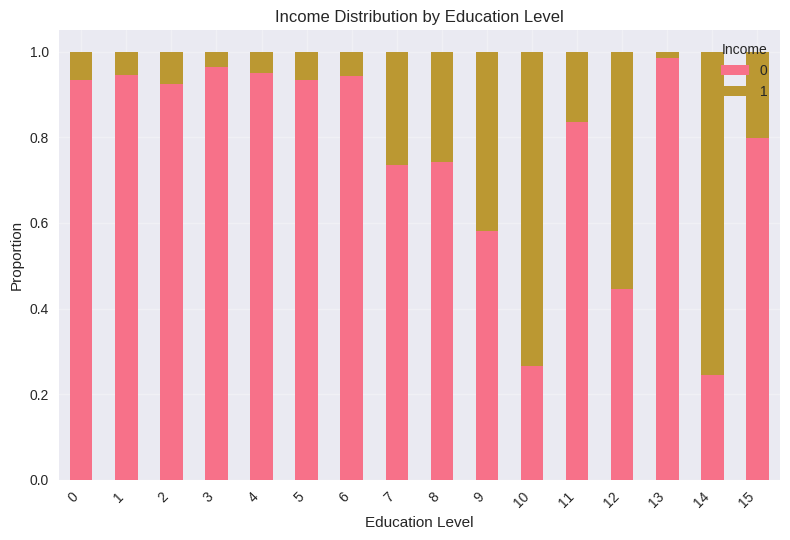

In [ ]:
# Plot the relationship between education and income
# TODO: Create a crosstab of education and income
# TODO: Create a stacked bar plot
# Hint: Use pd.crosstab() with normalize='index' and plot(kind='bar', stacked=True)

# Your code here:
# Plot the relationship between education and income
plt.figure(figsize=(12, 6))
education_income = pd.crosstab(df['education'], df['class'], normalize='index')
education_income.plot(kind='bar', stacked=True)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.legend(title='Income')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Preparing Data for Random Forest

Now we'll prepare our data for training the Random Forest model by splitting it into training and testing sets.

In [ ]:
# Separate features (X) and target variable (y)
# TODO: Create X (features) by dropping the target column
# TODO: Create y (target) with just the target column
# TODO: Split the data using train_test_split with test_size=0.2, random_state=42, and stratify=y
# TODO: Print dataset information

# Your code here:
X = df.drop(columns=['class'], axis=1)
y = df['class']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(f"Training Dataset Size= {x_train.shape[0]}")
print(f"Testing Dataset Size= {x_test.shape[0]} ")
print(f"Number of Features {x_train.shape[1]}")
print(f"\nTraining set class distribution:")
print(f">50: {sum(y_train==1)} ({sum(y_train==1)/len(y_train)*100:.2f}%)")
print(f"<=50: {sum(y_train==0)} ({sum(y_train==0)/len(y_train)*100:.2f}%)")

Training Dataset Size= 36177
Testing Dataset Size= 9045 
Number of Features 14

Training set class distribution:
>50: 8966 (24.78%)
<=50: 27211 (75.22%)


## Training a Random Forest Classifier

Now we'll train a Random Forest Classifier to predict income levels. We'll use scikit-learn's `RandomForestClassifier` class.

In [ ]:
# Create a Random Forest Classifier model
# TODO: Create a RandomForestClassifier with n_estimators=100, max_depth=10, random_state=42, and n_jobs=-1
# TODO: Fit the model on the training data

# Your code here:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rfc.fit(x_train, y_train)
print("Random Forest Classifier trained successfully!")
print(f"Number of Trees : {rfc.n_estimators}")
print(f"Maximum Depth of Trees : {rfc.max_depth}")

Random Forest Classifier trained successfully!
Number of Trees : 100
Maximum Depth of Trees : 10


## Making Predictions

Let's use our trained model to make predictions on the test set and evaluate its performance.

In [ ]:
# Make predictions on the test set
# TODO: Use the predict method to make predictions on X_test
# TODO: Get prediction probabilities for the positive class
# TODO: Calculate accuracy using accuracy_score
# TODO: Print performance metrics and classification report

# Your code here:
y_pred = rfc.predict(x_test)
y_pred_prob = rfc.predict_proba(x_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6803
           1       0.80      0.55      0.65      2242

    accuracy                           0.86      9045
   macro avg       0.83      0.75      0.78      9045
weighted avg       0.85      0.86      0.85      9045



## Confusion Matrix

Let's visualize the confusion matrix to better understand the model's performance.

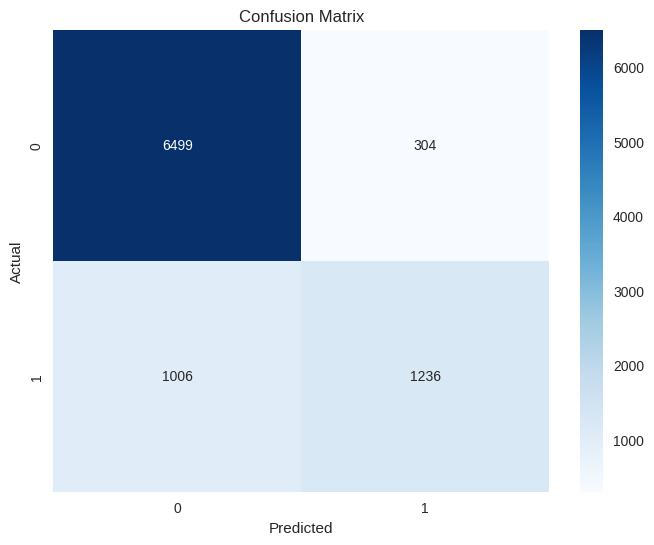

Precision: 0.80
Recall: 0.55
F1-Score: 0.65


In [ ]:
# Create confusion matrix
# TODO: Create confusion matrix using confusion_matrix
# TODO: Plot the confusion matrix using seaborn heatmap
# TODO: Calculate precision, recall, and F1-score
# TODO: Print the metrics

# Your code here:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#calculationssssssssssss
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) #Formula1
recall = tp / (tp + fn) #Formula2
f1_score = 2 * (precision * recall) / (precision + recall) #Formula3

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

#NOTE{ [Possitive]=0 = "<=50k"  & [Negative]=1= ">=50k" }

## Feature Importance

One of the advantages of Random Forest is that it provides insight into which features are most important for making predictions.

Top 10 Feature Importances:
           feature  importance
10    capital-gain    0.214177
7     relationship    0.187621
4    education-num    0.144839
5   marital-status    0.139842
0              age    0.084066
11    capital-loss    0.051194
12  hours-per-week    0.051100
3        education    0.040958
6       occupation    0.027428
9              sex    0.022964


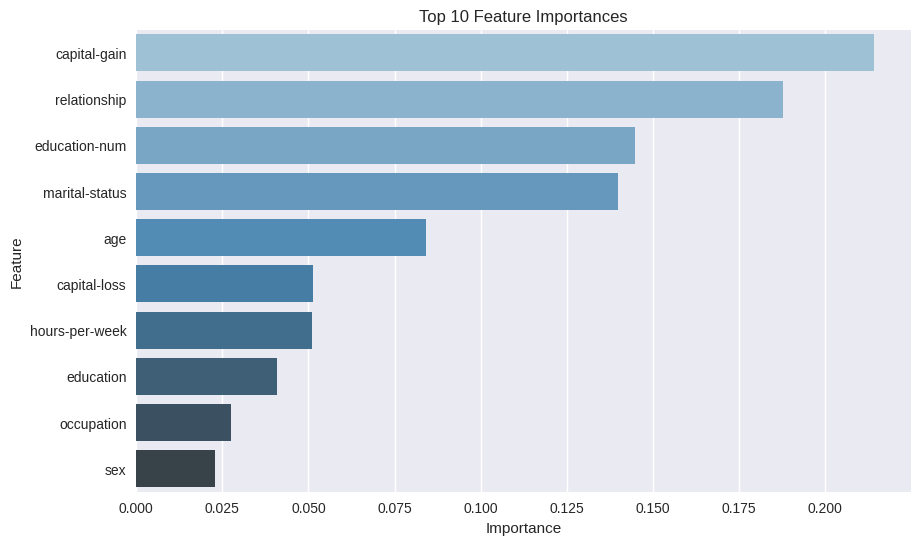

In [ ]:
# Get feature importances from the Random Forest
# TODO: Extract feature importances from the trained model
# TODO: Create a DataFrame with features and their importances
# TODO: Sort by importance (descending)
# TODO: Print the top 10 feature importances
# TODO: Create a bar plot of top 10 feature importances

# Your code here:
importances = rfc.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("Top 10 Feature Importances:")
print(feature_importance_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='Blues_d')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

All Feature Importances:
<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 10 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature     14 non-null     object 
 1   importance  14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes
None


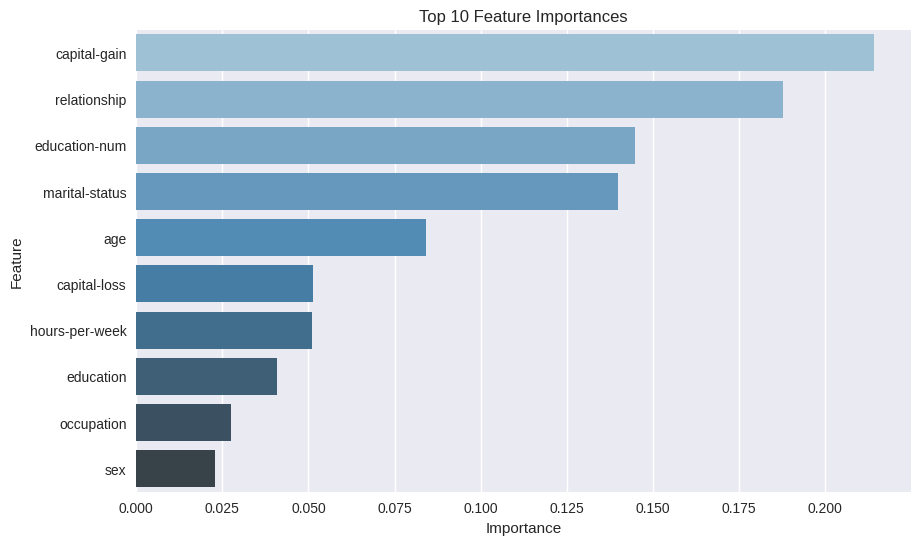

In [ ]:
print("All Feature Importances:")
print(feature_importance_df.info())

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='Blues_d')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Hyperparameter Tuning

Random Forest has several hyperparameters that can be tuned to improve performance. Let's experiment with different values for `n_estimators` and `max_depth`.

Best n_estimators: 250
Best max_depth: 15
Best accuracy: 0.86


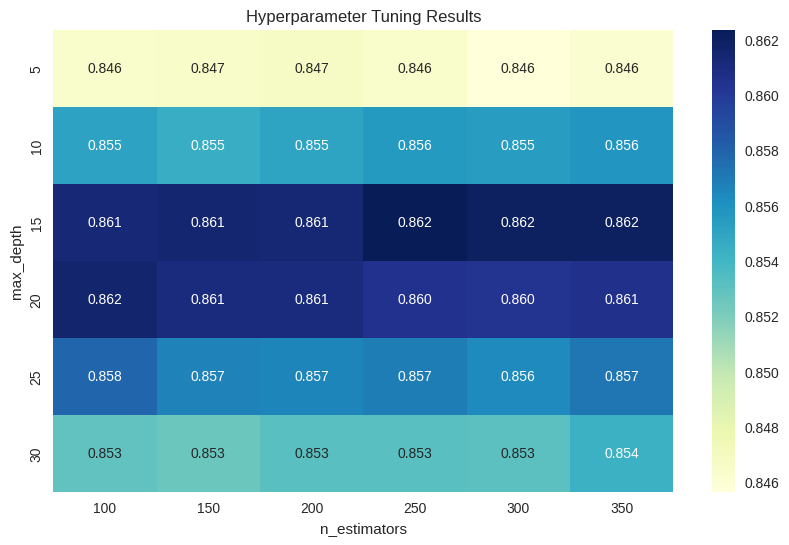

In [ ]:
# Test different n_estimators values
# TODO: Define ranges for n_estimators and max_depth
# TODO: Loop through combinations and train models
# TODO: Calculate and store accuracies
# TODO: Find the best combination
# TODO: Create and display a heatmap of results

# Your code here:
n_estimators_range = [100, 150, 200, 250, 300, 350]
max_depth_range = [5, 10, 15, 20, 25, 30]
results = []
for est in n_estimators_range:
    for depth in max_depth_range:
        rfc = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=42, n_jobs=-1)
        rfc.fit(x_train, y_train)
        y_pred = rfc.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((est, depth, accuracy))


best_result = max(results, key=lambda item: item[2])
print(f"Best n_estimators: {best_result[0]}")
print(f"Best max_depth: {best_result[1]}")
print(f"Best accuracy: {best_result[2]:.2f}")

# heatmap
results_df = pd.DataFrame(results, columns=['n_estimators', 'max_depth', 'accuracy'])
results_pivot = results_df.pivot(index='max_depth', columns='n_estimators', values='accuracy')

plt.figure(figsize=(10, 6))
sns.heatmap(results_pivot, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Hyperparameter Tuning Results')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

## Comparison with Single Decision Tree

Let's compare our Random Forest model with a single Decision Tree to see the improvement.

In [ ]:
# Train a single Decision Tree
# TODO: Import DecisionTreeClassifier
# TODO: Create and train a DecisionTreeClassifier
# TODO: Make predictions with both models
# TODO: Calculate accuracies
# TODO: Compare the results and print the improvement

# Your code here:

## Conclusion

In this tutorial, we've explored how to use Random Forest for classification tasks:

### Key Takeaways:

1. **Random Forest is powerful**: It combines multiple decision trees to make more accurate predictions

2. **Data preprocessing is crucial**: We handled missing values and encoded categorical variables

3. **Hyperparameter tuning matters**: We experimented with different combinations of `n_estimators` and `max_depth`

4. **Model evaluation is important**: We used multiple metrics (accuracy, precision, recall, F1-score) to assess our model

5. **Feature importance provides insights**: Random Forest helps identify which features are most predictive

6. **Ensemble methods outperform single models**: Our Random Forest significantly outperformed a single decision tree

### Next Steps:

1. Try other hyperparameters like `min_samples_split`, `min_samples_leaf`, and `max_features`
2. Experiment with different preprocessing techniques (e.g., one-hot encoding instead of label encoding)
3. Apply Random Forest to regression problems
4. Explore other ensemble methods like Gradient Boosting or XGBoost

Random Forest is a versatile and powerful algorithm that often performs well out-of-the-box. Understanding it is essential for any machine learning practitioner!